In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,order_id,product,quantity,price,total,date,hour,month,year,day,street,city,state,pincode,timezone
0,236670,Wired Headphones,2,11.99,23.98,31,22,8,2019,Sat,359 Spruce St,Seattle,WA,98101,PM
1,236671,Bose SoundSport Headphones,1,99.99,99.99,15,15,8,2019,Thu,492 Ridge St,Dallas,TX,75001,PM
2,236672,iPhone,1,700.00,700.00,6,14,8,2019,Tue,149 7th St,Portland,OR,97035,PM
3,236673,AA Batteries (4-pack),2,3.84,7.68,29,20,8,2019,Thu,631 2nd St,Los Angeles,CA,90001,PM
4,236674,AA Batteries (4-pack),2,3.84,7.68,15,19,8,2019,Thu,736 14th St,New York City,NY,10001,PM


# 1.1) Analysing on pricing on each product

In [3]:
print('Average price  : ',int(df['price'].mean()),'USD')
print('minimum price  : ',df['price'].min(),'USD')
print('minimum price  : ',df['price'].max(),'USD')


Average price  :  184 USD
minimum price  :  2.99 USD
minimum price  :  1700.0 USD


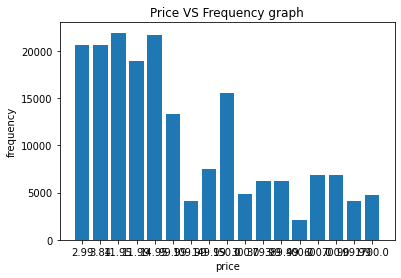

In [4]:
price =[]
for i in df['price'].unique():
    price.append([i,len(df[df['price'] == i])])
df_pr = pd.DataFrame(price,columns= ('price','freq'))
pr = list(df_pr.sort_values(by='price')['price'])
fr = list(df_pr.sort_values(by='price')['freq'])
pri = []
for i in pr:
    pri.append(str(i))

plt.bar(pri,fr)
plt.title('Price VS Frequency graph')
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()
    

# 1.2) analysing price of each order

In [5]:
print('minimum price of the product :',int(df['total'].min()))
print('maximum price of the product :',int(df['total'].max()))
print('Average price of the product :',int(df['total'].mean()))

minimum price of the product : 2
maximum price of the product : 3400
Average price of the product : 185


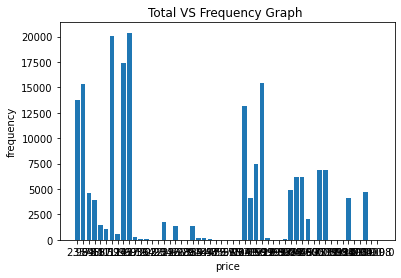

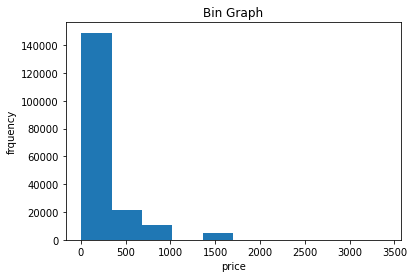

In [6]:
price =[]
freq = []
for i in df['total'].unique():
    price.append([i,len(df[df['total'] == i])])
df_pr = pd.DataFrame(price,columns= ('total','freq'))
pr = list(df_pr.sort_values(by='total')['total'])
fr = list(df_pr.sort_values(by='total')['freq'])
pri = []
for i in pr:
    pri.append(str(i))
plt.title('Total VS Frequency Graph ')
plt.xlabel('price')
plt.ylabel('frequency')
plt.bar(pri,fr)




# graph with bins or stating whether the graph is left skewed or right skewed 
fig,axs = plt.subplots(figsize = (6,4))
axs.hist(df['total'],bins= 10)
plt.title('Bin Graph')
plt.xlabel('price')
plt.ylabel('frquency')
plt.show()
    

In [7]:
df['total'].nunique()

53

# 1.3) analysis of quantity column

In [8]:
df['quantity'].min()
df['quantity'].max()
df['quantity'].mean()
df['quantity'].unique()

array([2, 1, 3, 4, 6, 7, 5, 8, 9], dtype=int64)

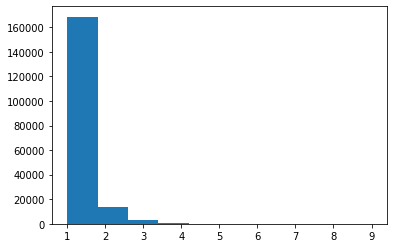

In [9]:
fig ,axs = plt.subplots(figsize=(6,4))
axs.hist(df['quantity'])
plt.show()

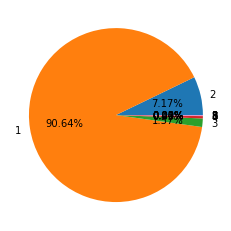

In [10]:
qn = []
fr = []
for i in df['quantity'].unique():
    qn.append(i)
    fr.append(len(df[df['quantity'] == i]))
plt.pie(fr,labels = qn,autopct ='%1.2f%%')
plt.show()

# 1.4) analysis full date column

In [11]:
df['date'].describe()

count    185950.000000
mean         15.759532
std           8.782176
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: date, dtype: float64

In [12]:
data = []
for i in df['date'].unique():
    data.append([i,(df['date']==i).sum()])
data = pd.DataFrame(data,columns = ['date','fr'])
data.sort_values(by='fr',ascending =False).head()


,date,fr
6,13,6306
24,10,6249
4,2,6197
11,19,6194
23,17,6177


# 1.5) analysis hourly sales 

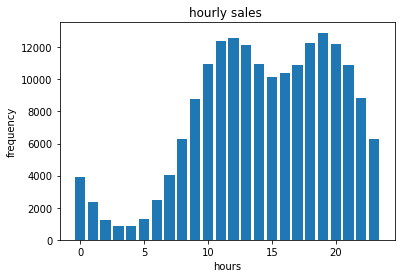

In [13]:
# based on frequency and hour 
data = []
for i in df['hour'].unique():
    data.append([i, (df['hour'] == i).sum()])
data = pd.DataFrame(data,columns = ['hour','fr' ])
hr = list(data.sort_values(by='hour',ascending=True)['hour'])
fr = list(data.sort_values(by='hour',ascending=True)['fr'])

plt.bar(hr,fr)
plt.title('hourly sales ')
plt.xlabel('hours')
plt.ylabel('frequency')
plt.show()

# 1.6) analysis date column

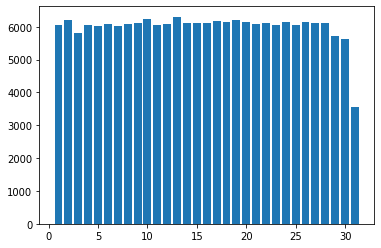

In [14]:
# based on frequency and hour 
data = []

for i in df['date'].unique():
    data.append([i, (df['date'] == i).sum()])
    
data = pd.DataFrame(data,columns = ['date','fr' ])
hr = list(data.sort_values(by='date',ascending=True)['date'])
fr = list(data.sort_values(by='date',ascending=True)['fr'])
plt.bar(hr,fr)
plt.show()

In [15]:
data.sort_values(by='fr',ascending = False).head()

,date,fr
6,13,6306
24,10,6249
4,2,6197
11,19,6194
23,17,6177


# 1.7) analysis month column

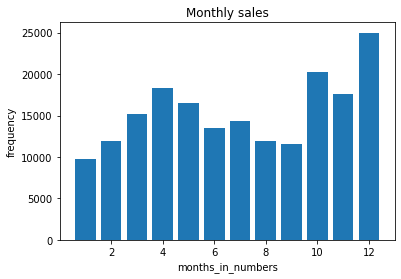

In [16]:
# sorting based on month
data = []
for i in df['month'].unique():
    data.append([i, (df['month'] == i).sum()])
data = pd.DataFrame(data,columns = ['month','fr' ])
hr = list(data.sort_values(by='month',ascending=True)['month'])
fr = list(data.sort_values(by='month',ascending=True)['fr'])
plt.bar(hr,fr)
plt.title('Monthly sales')
plt.xlabel('months_in_numbers')
plt.ylabel('frequency')
plt.show()

In [17]:
data.sort_values(by='fr',ascending = False).head()

,month,fr
9,12,24984
6,10,20282
3,4,18279
7,11,17573
8,5,16566


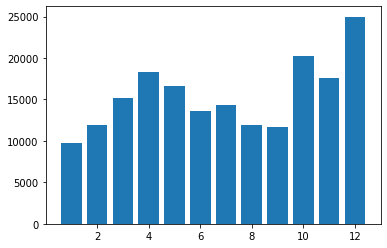

In [18]:
# sorting the column based on frequency
mn = list(data.sort_values(by='fr',ascending=True)['month'])
fr = list(data.sort_values(by='fr',ascending=True)['fr'])
plt.bar(mn,fr)
plt.show()

# 1.8) analysis year column 

In [20]:
y1 = len(df[df['year'] == 2019])
y2 = len(df[df['year'] == 2020])
print('orders in 2019 :',y1)
print('orders in 2020 :',y2)

orders in 2019 : 185916
orders in 2020 : 34


# 1.9) analysis  day column

In [21]:
# based on frequency and hour 
data = []
for i in df['day'].unique():
    data.append([i, (df['day'] == i).sum()])
data = pd.DataFrame(data,columns = ['day','fr' ])


# 1.10) analysis address column 

In [22]:
df.head()

,order_id,product,quantity,price,total,date,hour,month,year,day,street,city,state,pincode,timezone
0,236670,Wired Headphones,2,11.99,23.98,31,22,8,2019,Sat,359 Spruce St,Seattle,WA,98101,PM
1,236671,Bose SoundSport Headphones,1,99.99,99.99,15,15,8,2019,Thu,492 Ridge St,Dallas,TX,75001,PM
2,236672,iPhone,1,700.00,700.00,6,14,8,2019,Tue,149 7th St,Portland,OR,97035,PM
3,236673,AA Batteries (4-pack),2,3.84,7.68,29,20,8,2019,Thu,631 2nd St,Los Angeles,CA,90001,PM
4,236674,AA Batteries (4-pack),2,3.84,7.68,15,19,8,2019,Thu,736 14th St,New York City,NY,10001,PM


In [26]:
df.groupby('state').size().sort_values(ascending = False).head()

state
CA    74337
NY    24876
TX    24725
MA    19934
GA    14881
dtype: int64

In [21]:
df['address'].nunique()

KeyError: 'address'

# 1.11) analysis city column 

In [27]:
df['city'].nunique()

9

In [28]:
df.groupby('city').size().sort_values(ascending=False)

city
San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
dtype: int64

In [30]:
# based on frequency and hour 
data = []
for i in df['city'].unique():
    data.append([i, df[df['city'] == i]])
data = pd.DataFrame(data,columns = ['city','fr' ])
ct = list(data.sort_values(by='fr',ascending = False)['city'])
fr = list(data.sort_values(by='fr',ascending = False)['fr'])
plt.bar(ct,fr)
plt.show()

ValueError: Can only compare identically-labeled DataFrame objects

In [31]:
data

,city,fr
0,Seattle,order_id product qu...
1,Dallas,order_id product ...
2,Portland,order_id product qu...
3,Los Angeles,order_id product qu...
4,New York City,order_id product ...
5,San Francisco,order_id product qu...
6,Boston,order_id product qu...
7,Atlanta,order_id product ...
8,Austin,order_id product qu...


NameError: name 'ct' is not defined

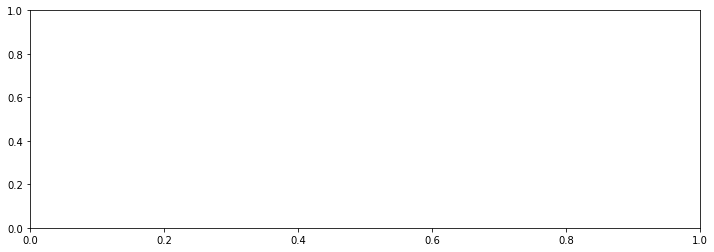

In [22]:
fig, axs = plt.subplots(figsize = (12,4))
axs.bar(ct,fr)
plt.show()

# 1.12) analysis states 

In [23]:
df['state'].unique()

array(['WA', 'TX', 'OR', 'CA', 'NY', 'MA', 'GA', 'ME'], dtype=object)

In [24]:
# based on frequency and hour 
data = []
for i in df['state'].unique():
    data.append(i, df[df['state'] == i])
data = pd.DataFrame(data,columns = ['state','fr' ])
ct = list(data.sort_values(by='fr',ascending = False)['state'])
fr = list(data.sort_values(by='fr',ascending = False)['fr'])
plt.bar(ct,fr)


TypeError: list.append() takes exactly one argument (2 given)

# 1.13) analyis pincode 

In [25]:
df['pincode'].unique()

array([98101, 75001, 97035, 90001, 10001, 94016,  2215, 30301, 73301,
        4101], dtype=int64)

In [26]:
# based on frequency and hour 
data = []
for i in df['pincode'].unique():
    data.append(i, df[df['pincode'] == i])
data = pd.DataFrame(data,columns = ['pincode','fr' ])
pi = list(data.sort_values(by='fr',ascending = False)['pincode'])
fr = list(data.sort_values(by='fr',ascending = False)['fr'])
pincode = []
for i in pi:
    pincode.append(str(i))
fig, axs = plt.subplots(figsize = (8,4))
axs.bar(pincode,fr)
plt.show()


TypeError: list.append() takes exactly one argument (2 given)

# 1.14) analysis timezone

AttributeError: 'Line2D' object has no property 'labels'

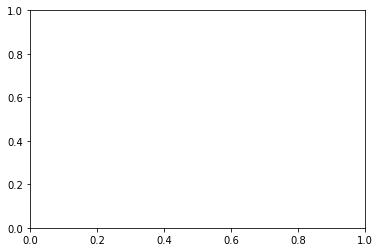

In [27]:
p1 = (len(df[df['timezone'] == 'AM']))
p2 = (len(df[df['timezone'] == 'PM']))
plt.plot([p1,p2],labels=['AM','PM'],explode= [0.1,0],shadow = True,autopct='%1.2f%%')
plt.title('Orders based on timezone')

plt.show()